In [1]:
%matplotlib inline

# ==========================
# PARTE 2 - USANDO O MODELO
# ==========================


# Exercício de reconhecimento de dígitos

Vamos testar o modelo utilizando duas imagens, cada uma com vários dígitos escritos


# Carregando imagens para testes

** TAREFA 01 **: Carregue as imagens: "./images/photo_1.jpg" e "./images/photo_2.jpg" 

* Dica 1: Não esqueça de converter para cinza (cv2.COLOR_BGR2GRAY)


In [3]:
import cv2

#imagem1
#imagem2

# ====================== INÍCIO DO TEU CÓDIGO ======================




# ====================== FIM DO TEU CÓDIGO ======================

img_gray1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY) 
img_gray2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY) 


# Mostrando as duas imagens

** TAREFA 02 **: mostre as imagens: imagem1 e imagem2

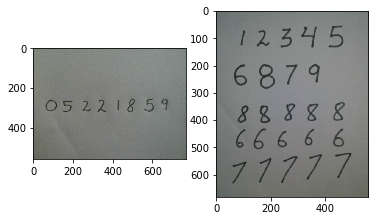

In [4]:
import matplotlib.pyplot as plt

# ====================== INÍCIO DO TEU CÓDIGO ======================



# ====================== FIM DO TEU CÓDIGO ======================

# Selecionando Áreas de interesse na imagem 1

A seleção de áreas de interesse pode ser feitas de várias formas, por seleção de cor, por limiares, por extração de features, operações lógicas, etc... Na maioria das vezes o processo é a únião de várias técnicas. 

Nestas imagens o que desejamos é extrair cada número para ser testado no modelo.

O processo será o seguinte:
* Aplicar um filtro gaussiano
* Aplicar um limiar
* Pesquisar por contornos
* Extrair retangulos dos contornos




In [5]:
# Gaussian filtering
im_gauss = cv2.GaussianBlur(img_gray1, (5, 5), 0)

# Threshold
ret, im_th = cv2.threshold(im_gauss, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours 
im2, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]


# Mostrando o resultado do processo

Aqui estou mostrando o resultado final da seleção de áreas de interesse.   
Mas, você pode mostrar o resultado de cada parte do processo, como a imagem após o Gauss, ou após o limiar, etc...


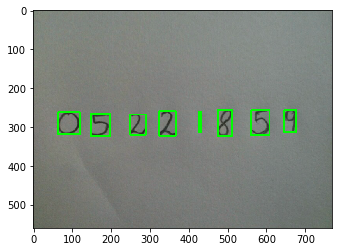

In [6]:
# Criando uma cópia 
im = imagem1.copy()

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 

    
plt.imshow(im)
plt.show()



# Fazer a predição das áreas de interesse

Agora que já encontramos nossas áreas de interesse, vamos fazer a predição de cada área.


## Primeiro vamos ler o modelo SALVO

In [7]:
from sklearn.externals import joblib

# Lendo o modelo SALVO
clf = joblib.load("digits_cls.pkl")

## Nesta ocorre o seguinte processo:

* Percorremos todos os retangulos
    * Convertemos o retangulo em coordenadas da imagem
    * Extraímos o retangulo da imagem (patch), assim temos apenas uma pequena imagem que deve ser um dígito
    * Modificamos a dimensão do patch para 28x28 (tamanho das imagens de treinamento)
    * Dilatamos o patch
    * Calculamos o mesmo HOG usando no treinamento
    * Fazemos a predição com o modelo SVM
    * Escrevemos na imagem original o predição

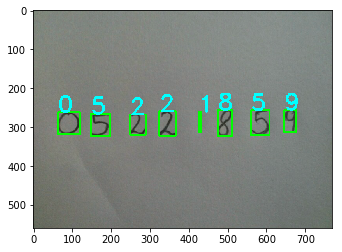

In [8]:
from skimage.feature import hog
import numpy as np

# Criando uma cópia 
im = imagem1.copy()

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, block_norm='L2', orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

plt.imshow(im)
plt.show()

# Ultima tarefa - Repita o processo para a imagem 2

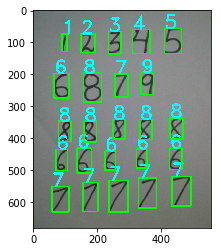

In [9]:
# ====================== INÍCIO DO TEU CÓDIGO ======================



# ====================== FIM DO TEU CÓDIGO ======================